## <font color='green'> Application of the LASSO to Boston Data

In [3]:
import os
os.chdir('../data')

import numpy as np
import pandas as pd
import math

np.set_printoptions(precision=3, suppress=True)

raw0 = pd.read_csv('Boston.csv')

In [4]:
raw0.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
# Store variable names for labeling later
varname=list(raw0.iloc[:,1:-1].columns)

# Define y and X (including all the regressors)
raw0 = raw0.iloc[:,1:].values
Y = raw0[:,-1]
X = raw0[:,0:-1]

In [6]:
varname

['crim',
 'zn',
 'indus',
 'chas',
 'nox',
 'rm',
 'age',
 'dis',
 'rad',
 'tax',
 'ptratio',
 'black',
 'lstat']

### <font color='green'> 1) Lasso Estimation with a Preselected Tuning Parameter Value ($\lambda$)

Parameters in linear_model.Lasso: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

In [7]:
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

las = linear_model.Lasso(alpha=0.5).fit(X,Y) # alpha is the tuning parameter

In [8]:
print(las.coef_)

[-0.115  0.    -0.     0.397 -0.     2.974 -0.    -0.171 -0.    -0.
 -1.598  0.543 -3.666]


### <font color='green'> 2) Computation of a Lasso Solution Path
Parameters and returns in lasso_path: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.lasso_path.html

In [9]:
import matplotlib.pyplot as plt
from sklearn.linear_model import lasso_path
from itertools import cycle

In [10]:
# Use "eps" to specify the length and density of the grid (eps = alpha_min / alpha_max)
eps = 1e-10  
alphas_lasso, coefs_lasso, _ = lasso_path(X, Y, eps = eps)

In [11]:
print(alphas_lasso) 

[6.778 5.371 4.257 3.373 2.673 2.119 1.679 1.33  1.054 0.836 0.662 0.525
 0.416 0.33  0.261 0.207 0.164 0.13  0.103 0.082 0.065 0.051 0.041 0.032
 0.026 0.02  0.016 0.013 0.01  0.008 0.006 0.005 0.004 0.003 0.002 0.002
 0.002 0.001 0.001 0.001 0.001 0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.   ]


In [12]:
print(coefs_lasso)

[[-0.    -0.    -0.    ... -0.928 -0.928 -0.928]
 [ 0.     0.     0.    ...  1.082  1.082  1.082]
 [-0.    -0.    -0.    ...  0.141  0.141  0.141]
 ...
 [-0.    -0.    -0.    ... -2.061 -2.061 -2.061]
 [ 0.     0.     0.    ...  0.849  0.849  0.849]
 [-0.    -1.254 -1.945 ... -3.744 -3.744 -3.744]]


In [13]:
# Each row of "coefs_lasso" contains a series of estimates for a coefficient over the grid
# Each column contains coefficient etimates at each lambda value
print(coefs_lasso[2]) 

[-0.    -0.    -0.    -0.    -0.    -0.    -0.    -0.    -0.    -0.
 -0.    -0.    -0.    -0.    -0.    -0.013 -0.084 -0.038 -0.001 -0.
 -0.    -0.    -0.    -0.     0.     0.     0.     0.022  0.046  0.066
  0.082  0.094  0.104  0.111  0.118  0.122  0.126  0.129  0.132  0.134
  0.135  0.136  0.137  0.138  0.139  0.139  0.139  0.14   0.14   0.14
  0.14   0.14   0.141  0.141  0.141  0.141  0.141  0.141  0.141  0.141
  0.141  0.141  0.141  0.141  0.141  0.141  0.141  0.141  0.141  0.141
  0.141  0.141  0.141  0.141  0.141  0.141  0.141  0.141  0.141  0.141
  0.141  0.141  0.141  0.141  0.141  0.141  0.141  0.141  0.141  0.141
  0.141  0.141  0.141  0.141  0.141  0.141  0.141  0.141  0.141  0.141]


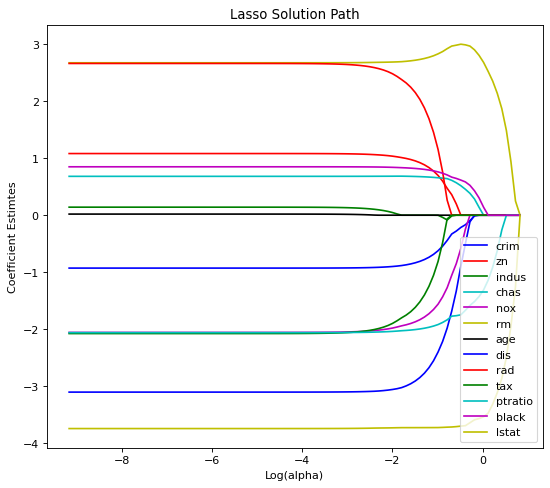

In [14]:
# Display the solution path
plt.figure(figsize=(8, 7), dpi=80)
colors = cycle(['b', 'r', 'g', 'c','m', 'y', 'k'])

# Take the log of the alpha values to adjust the scale of X-axis
log_alphas_lasso = np.log10(alphas_lasso) 

# Use a for-loop to plot several paths on a figure 
for coef_l, c, vn in zip(coefs_lasso, colors, varname):
    l1 = plt.plot(log_alphas_lasso, coef_l, c=c, label=vn)
    
plt.xlabel('Log(alpha)')
plt.ylabel('Coefficient Estimtes')
plt.title('Lasso Solution Path')
plt.legend()
plt.savefig('lassopath.png')
plt.show()


### <font color='green'> 3) Selection of a Tuning Parameter Value (= Selection of a Model) in the LASSO using CV/BIC/AIC

In [21]:
from sklearn.linear_model import LassoLarsCV, LassoLarsIC
import time

start = time.time()
lascv = LassoLarsCV(cv=5).fit(X, Y)
t_lasso_lars_cv = time.time() - start

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsCV())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,


#### <font color='green'> i) Cross Validation

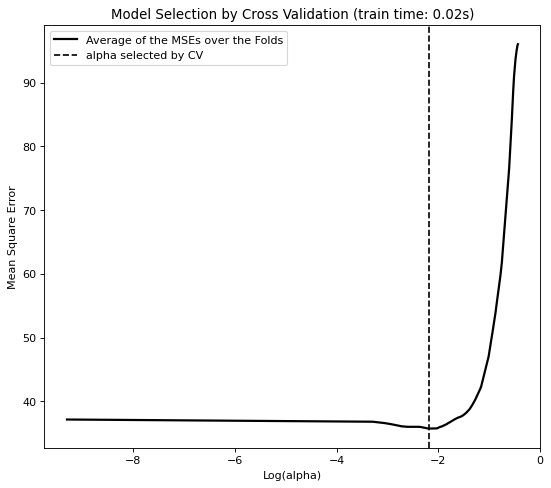

In [22]:
# Display the results
eps = 5e-10
lascv_log_alphas = np.log10(lascv.cv_alphas_ + eps) 
lascv_log_alpha = np.log10(lascv.alpha_)
# Caution: lascv.alphas contains the alpha at the lowest MSE whereas lascv.cv_alphas_ contains the set of alphas used in the path
# The smallest value in lascv.cv_alphas_ is 0 so we add eps (a small number) to avoid log(0)

plt.figure(figsize=(8, 7), dpi=80)
plt.plot(lascv_log_alphas, lascv.mse_path_.mean(axis=1), 'k',
         label='Average of the MSEs over the Folds', linewidth=2)
plt.axvline(lascv_log_alpha, linestyle='--', color='k',
            label='alpha selected by CV')
plt.legend()

plt.xlabel('Log(alpha)')
plt.ylabel('Mean Square Error')
plt.title('Model Selection by Cross Validation (train time: %.2fs)'
          % t_lasso_lars_cv)
plt.show()

In [24]:
# Access the Lasso estimates at the alpha selected by CV
print(lascv.coef_)

[-0.498  0.539 -0.06   0.646 -1.359  2.894  0.    -2.107  0.531 -0.29
 -1.861  0.722 -3.721]


#### <font color='green'> ii) BIC and AIC

In [25]:
lasic_bic = LassoLarsIC(criterion='bic').fit(X, Y)
lasic_aic = LassoLarsIC(criterion='aic').fit(X, Y)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a Stand

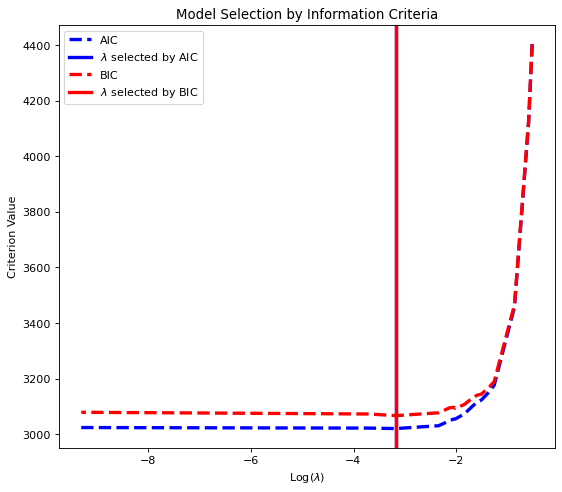

In [26]:
# Display results
# make a fn to produce figures with the same features repeatedly
def plot_ic_criterion(model, name, color): 
    alpha_ = model.alpha_ + eps
    alphas_ = model.alphas_ + eps
    criterion_ = model.criterion_ # BIC or AIC values over the alpha values
    plt.plot(np.log10(alphas_), criterion_, '--', color=color,
             linewidth=3, label='%s' % name)
    plt.axvline(np.log10(alpha_), color=color, linewidth=3,
                label='$\lambda$ selected by %s ' % name)
    plt.xlabel('Log($\lambda$)')
    plt.ylabel('Criterion Value')
    

plt.figure(figsize=(8, 7), dpi=80)
plot_ic_criterion(lasic_aic, 'AIC', 'b')
plot_ic_criterion(lasic_bic, 'BIC', 'r')
plt.legend()
plt.title('Model Selection by Information Criteria')
#plt.show()
plt.savefig('lasso.png')

In [27]:
# Access the Lasso estimates at the alpha selected by AIC and BIC
print(lasic_aic.coef_)
print(lasic_bic.coef_)

[-0.887  1.014  0.     0.685 -1.946  2.692  0.    -3.032  2.394 -1.812
 -2.028  0.835 -3.728]
[-0.887  1.014  0.     0.685 -1.946  2.692  0.    -3.032  2.394 -1.812
 -2.028  0.835 -3.728]


### <font color='darkred'> HW5
    
* Use the dataset, "Hitters.csv", posted on BB to explain/predict a baseball player’s salary <u> using a subset of covariates in the dataset </u>.
    
* In order to select a subset of covariates, do the following:
    - Forward and backward stepwise selections based on AIC and BIC
    - LASSO Estimations with CV, AIC and BIC
    - Produce tables or figures or both to summarize your results
    
* For this exercise, you need to take care of missing values and also generate dummies for some variables